# Global Power Plant Database

Project Description


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [280]:
# importing the required dependenices
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [310]:
# reading the data set
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
# finding the shape of dataset
df.shape

(907, 27)

In [312]:
# checking datatypes and other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [313]:
# checking the null values in the dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

from  above output we came accross that the columns other_fuel1,other_fuel2,other_fuel3 wepp_id generation_gwh_2013 are emplty so we will remove the columns

In [314]:
# removing the columns that don't have a single value
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','estimated_generation_gwh','generation_gwh_2019','generation_data_source'],inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
# printing the statistical information of dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [316]:
# finding the total power plant
print(df['name'].unique().tolist())

['ACME Solar Tower', 'ADITYA CEMENT WORKS', 'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP', 'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM', 'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II', 'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT', 'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL', 'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP', 'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant', 'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant', 'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm', 'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant', 'Askandra - Electromech Maritech Solar Power Plant', 'Askandra - Finehope Solar Power Plant', 'Askandra - Khaya Solar Power Plant', 'Askandra - Newton Solar Power Plant', 'Askandra - Saidham Solar Power Plant', 'Askandra - Vasavi Solar Power Plant', 'BADARPUR', 'BAGALKOT ICP', 'BAGLIHAR HEP', 'BAGLIHAR HEP-II', 'BAIRA SIUL', 'BAKRESWAR', 'BALCO TPP', 'BA

In [317]:
data2c=df[['name','capacity_mw',]][df['primary_fuel']=='Solar']

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

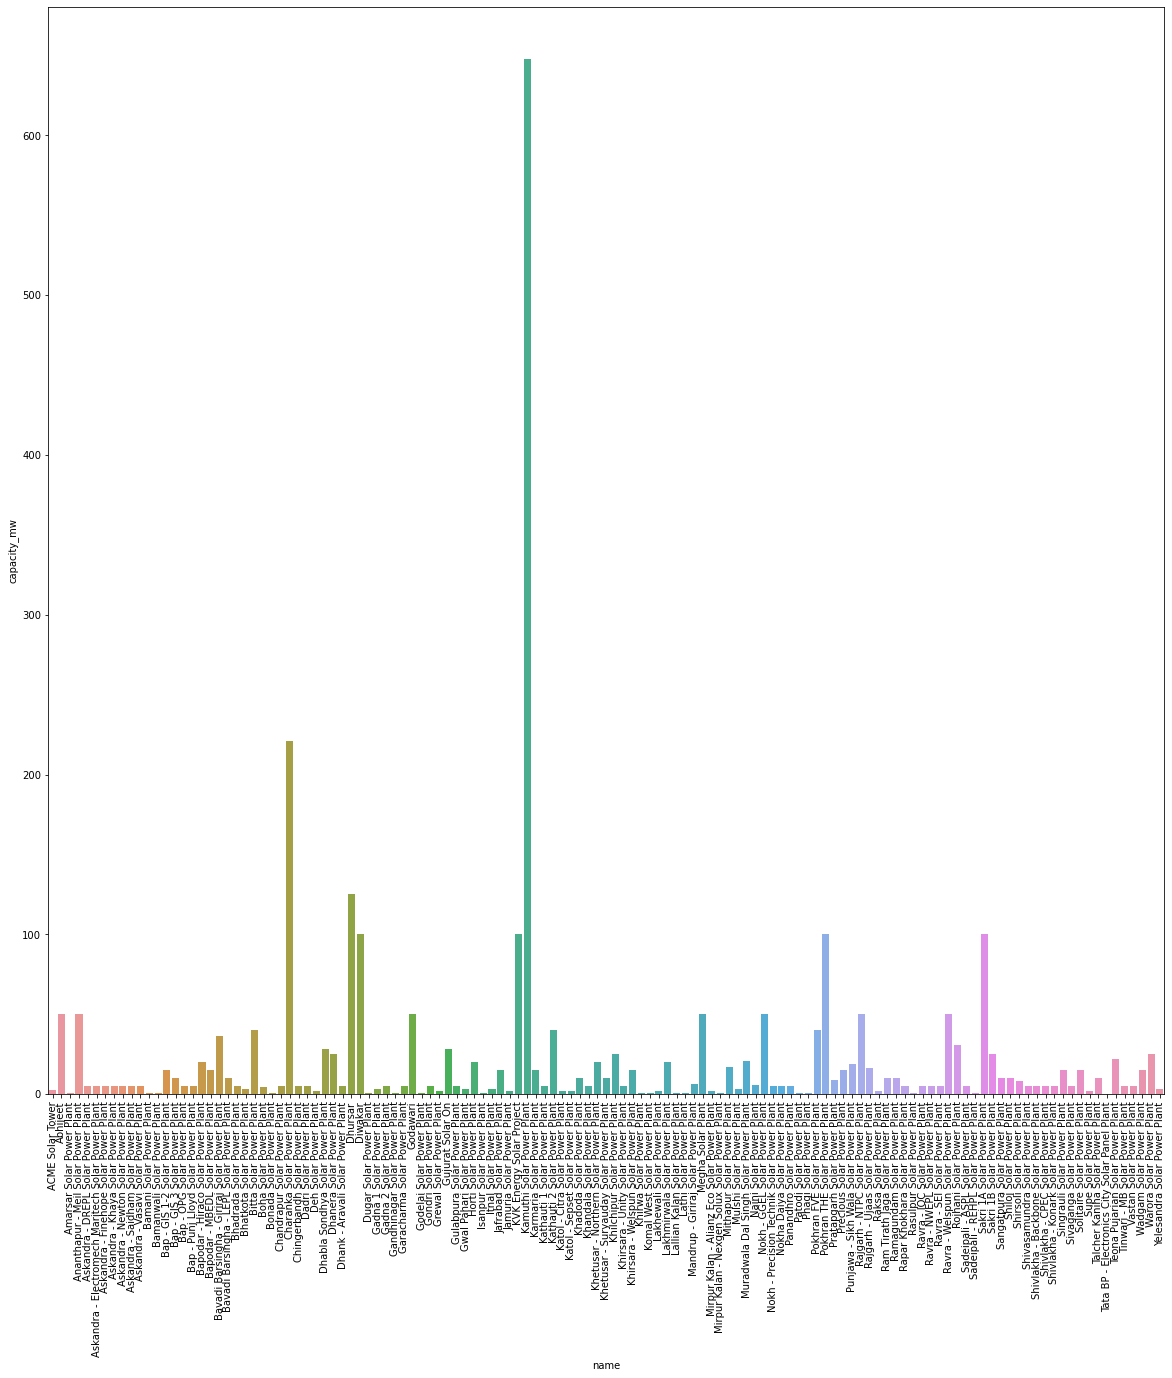

In [318]:
# plotting the capacity of solar power plant 
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=data2c, x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

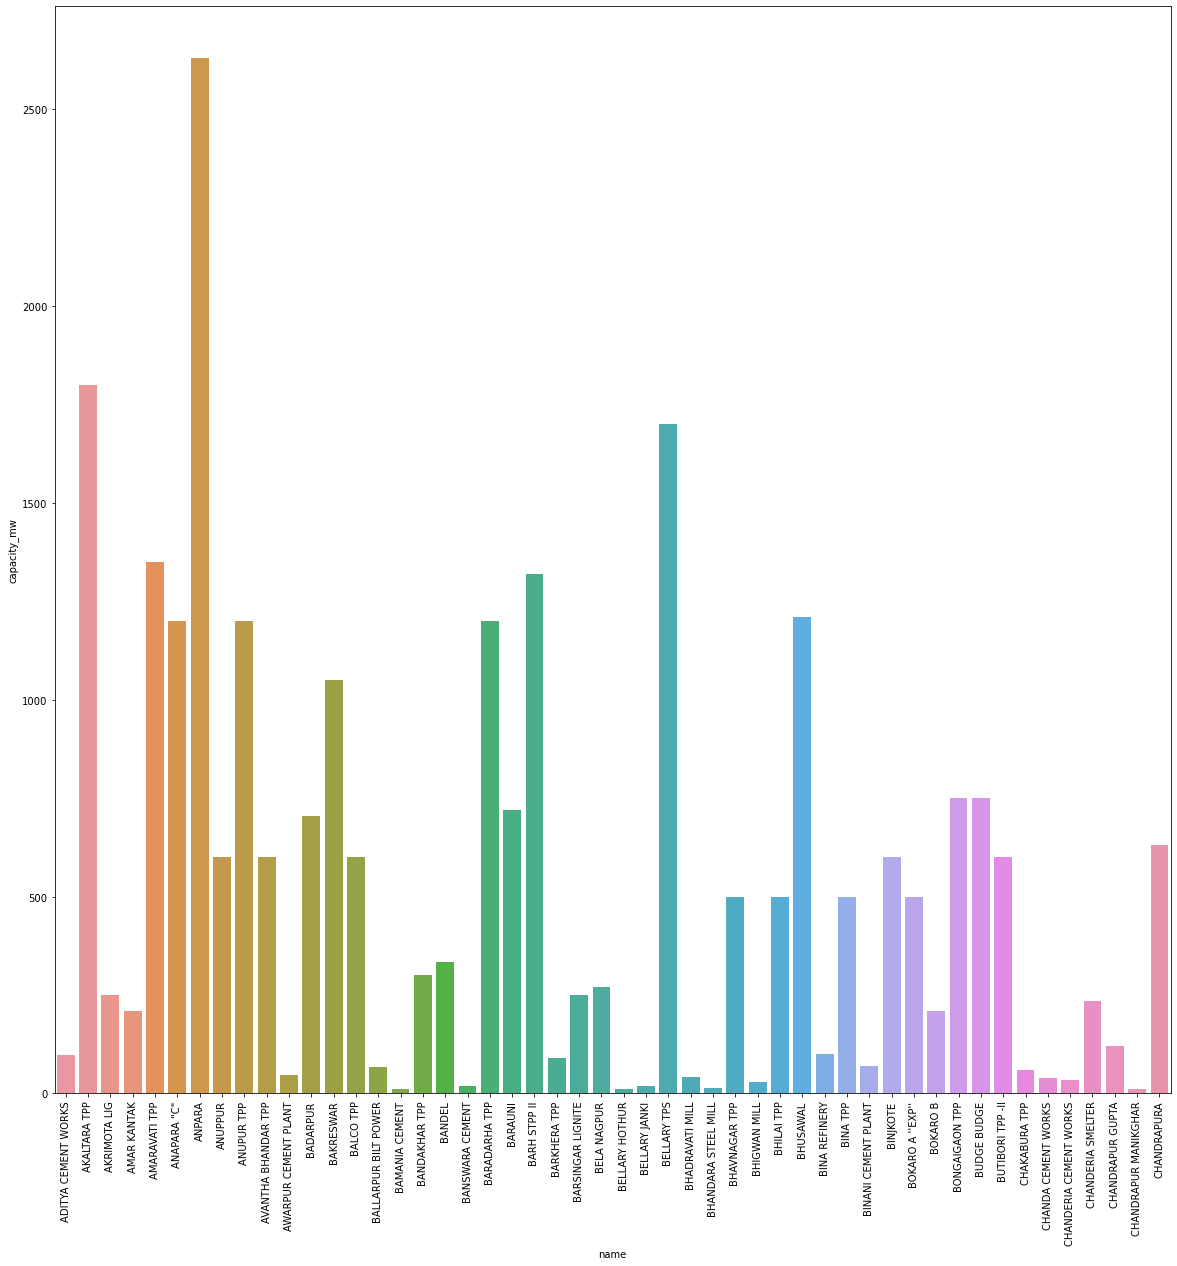

In [319]:
# plotting the capacity of Coal power plant 
df_coal=df[['name','capacity_mw',]][df['primary_fuel']=='Coal']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_coal[:50], x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

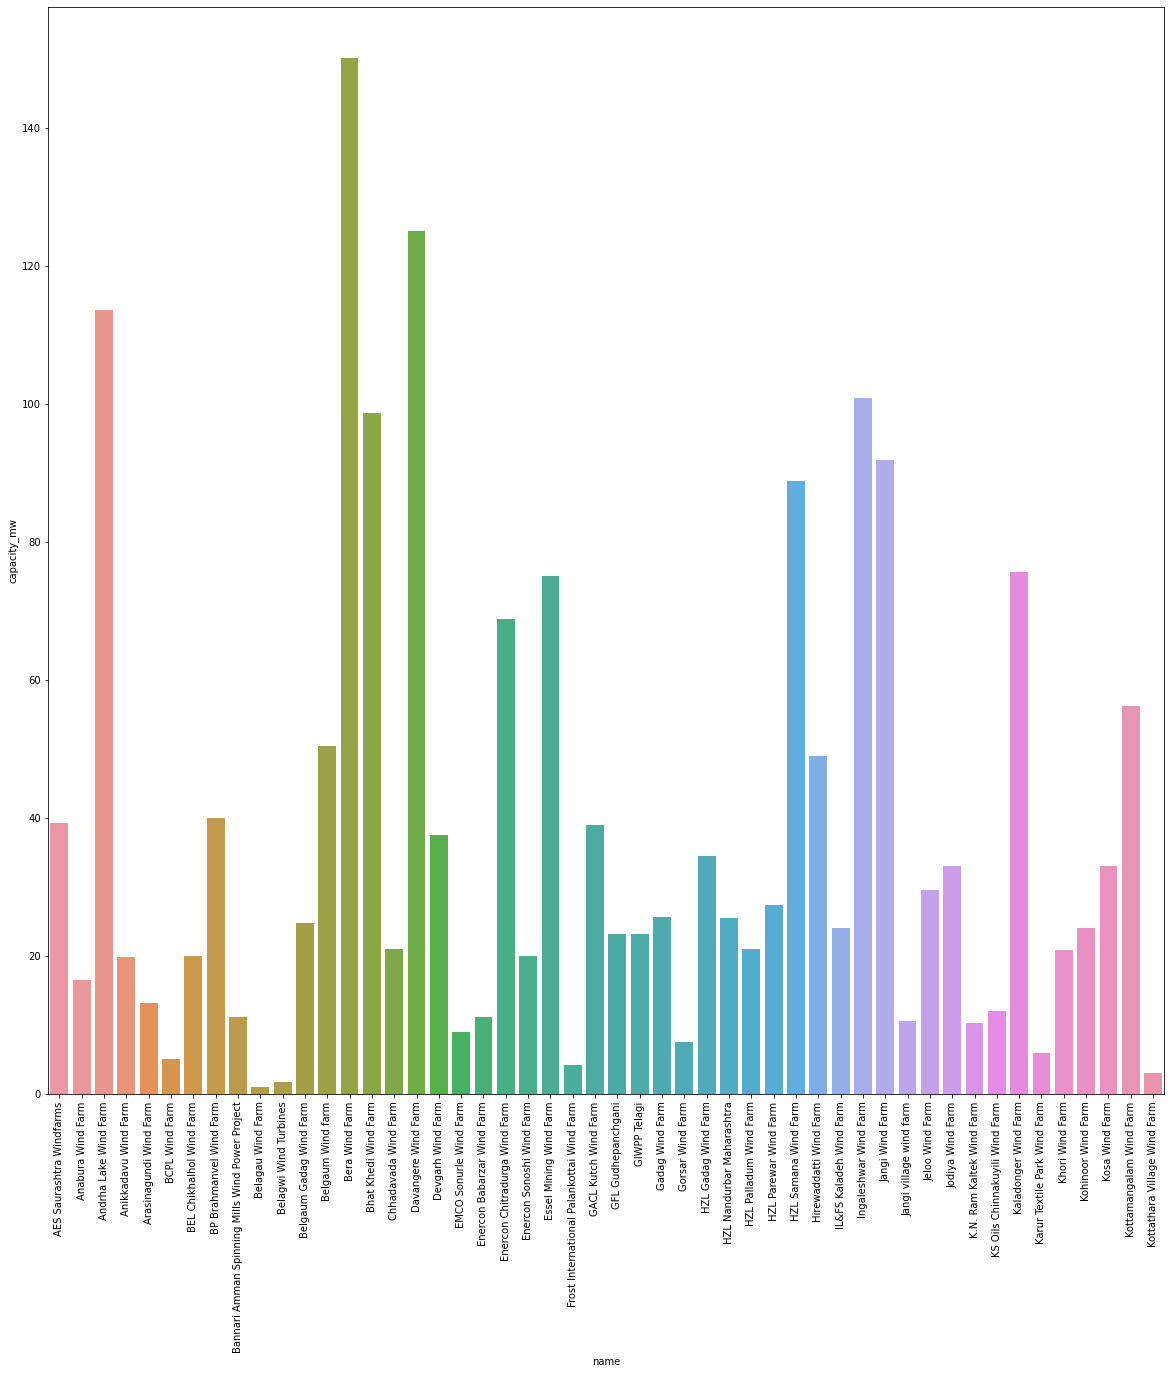

In [320]:
# plotting the capacity of Wind power plant 
df_wind=df[['name','capacity_mw',]][df['primary_fuel']=='Wind']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_wind[:50], x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

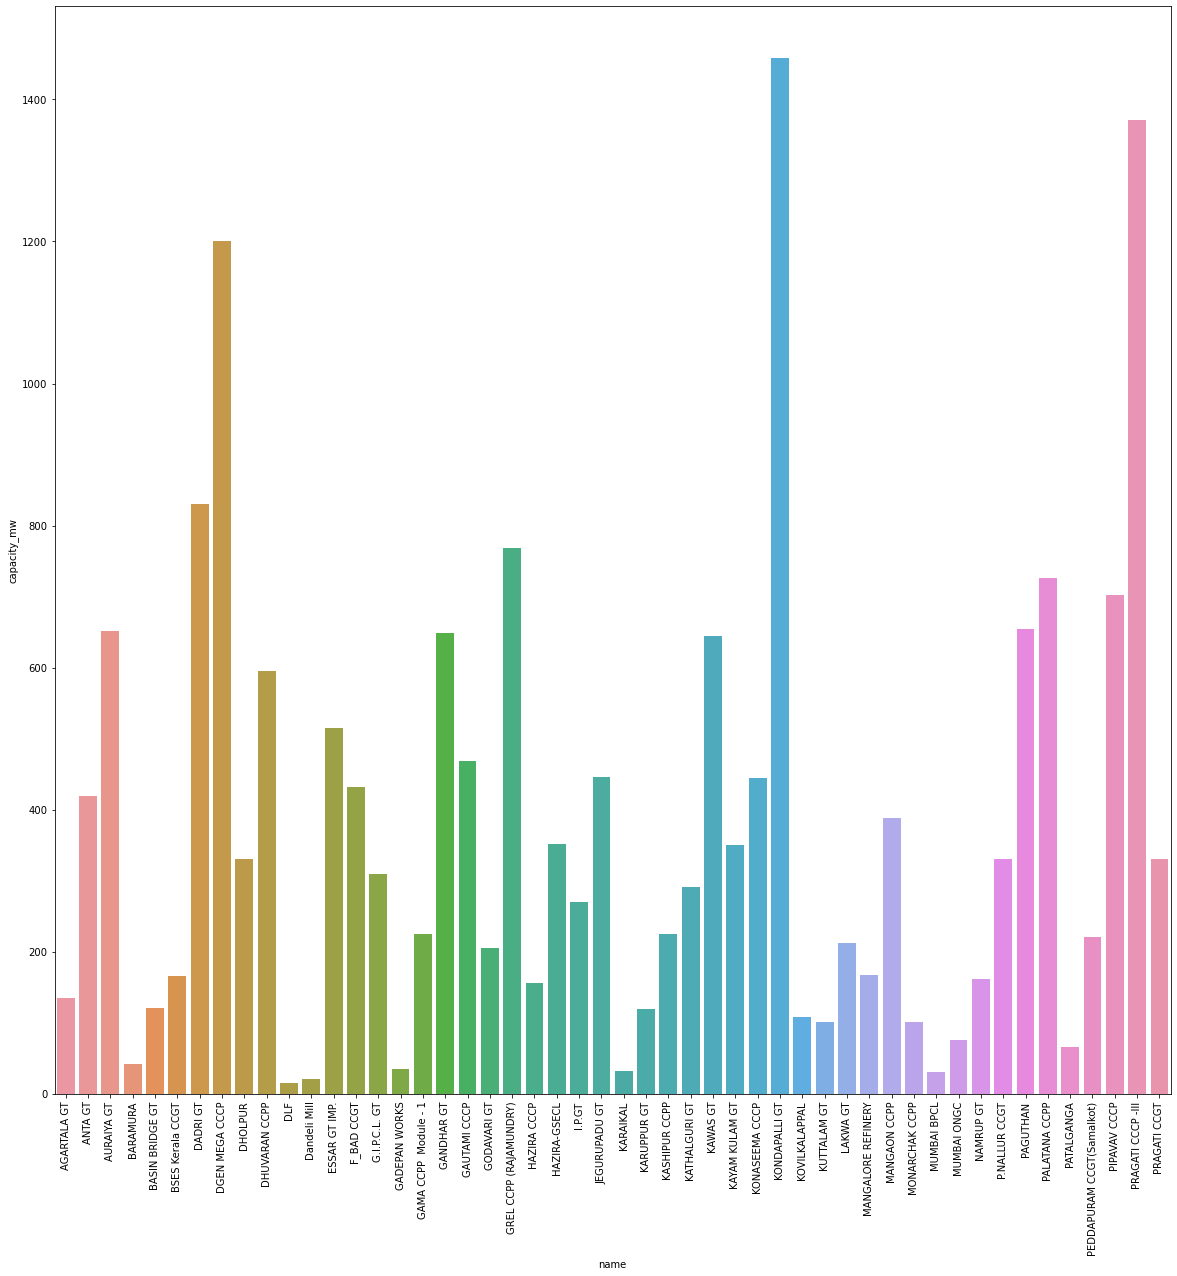

In [321]:
# plotting the capacity of Gas power plant 
df_gas=df[['name','capacity_mw',]][df['primary_fuel']=='Gas']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_gas[:50], x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

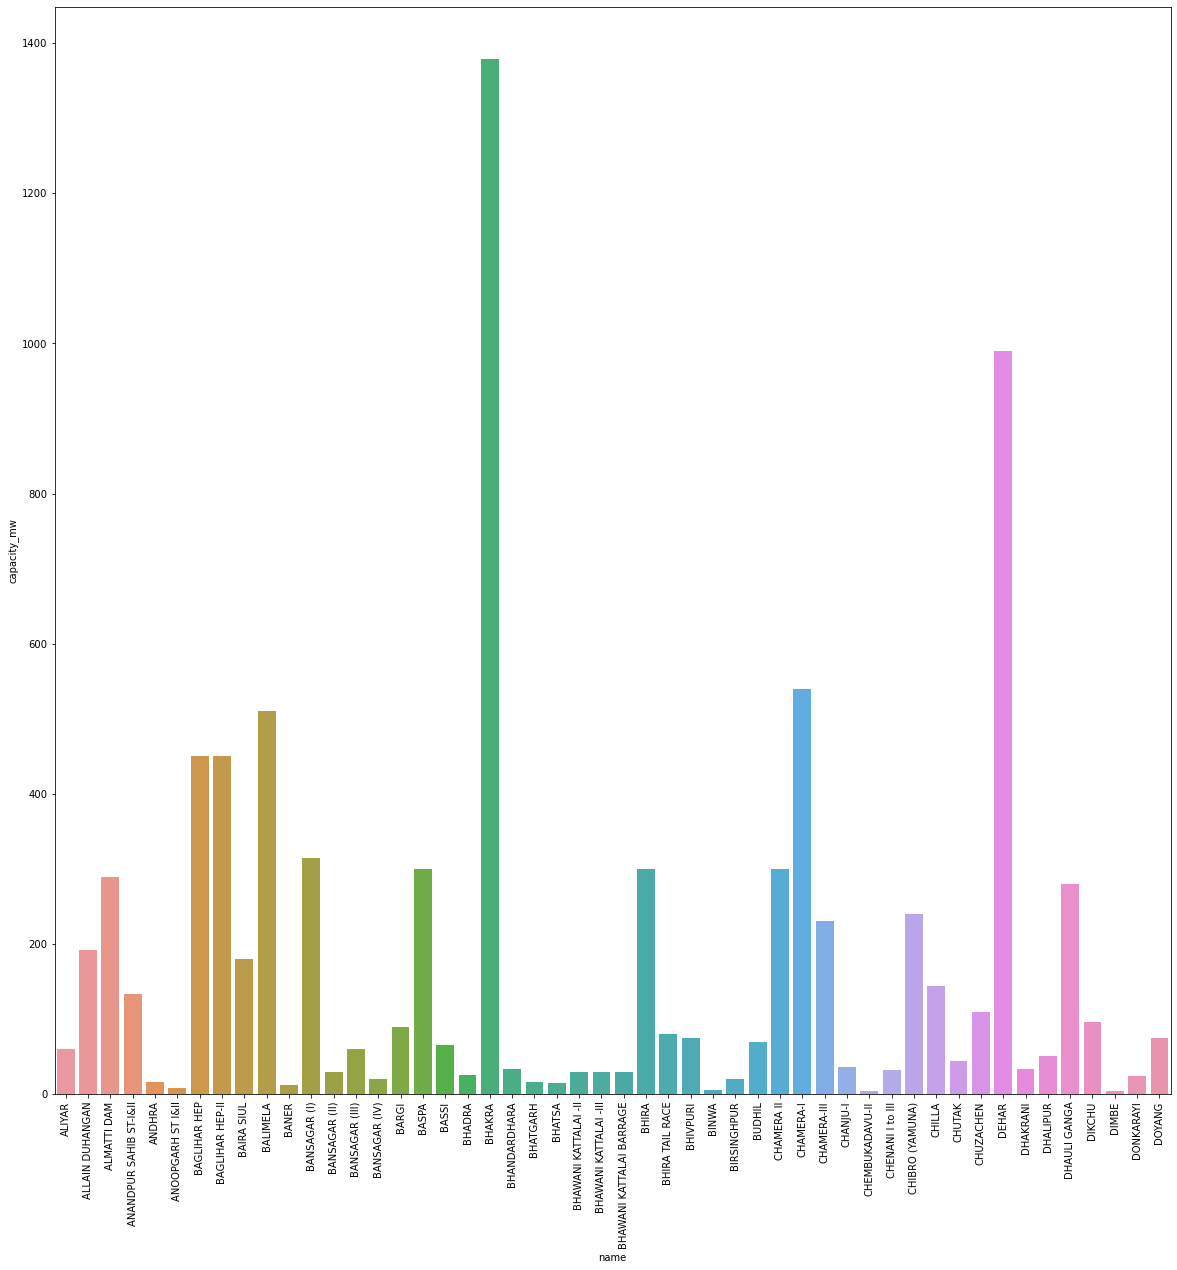

In [322]:
# plotting the capacity of Hydro power plant 
df_hydro=df[['name','capacity_mw',]][df['primary_fuel']=='Hydro']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_hydro[:50], x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

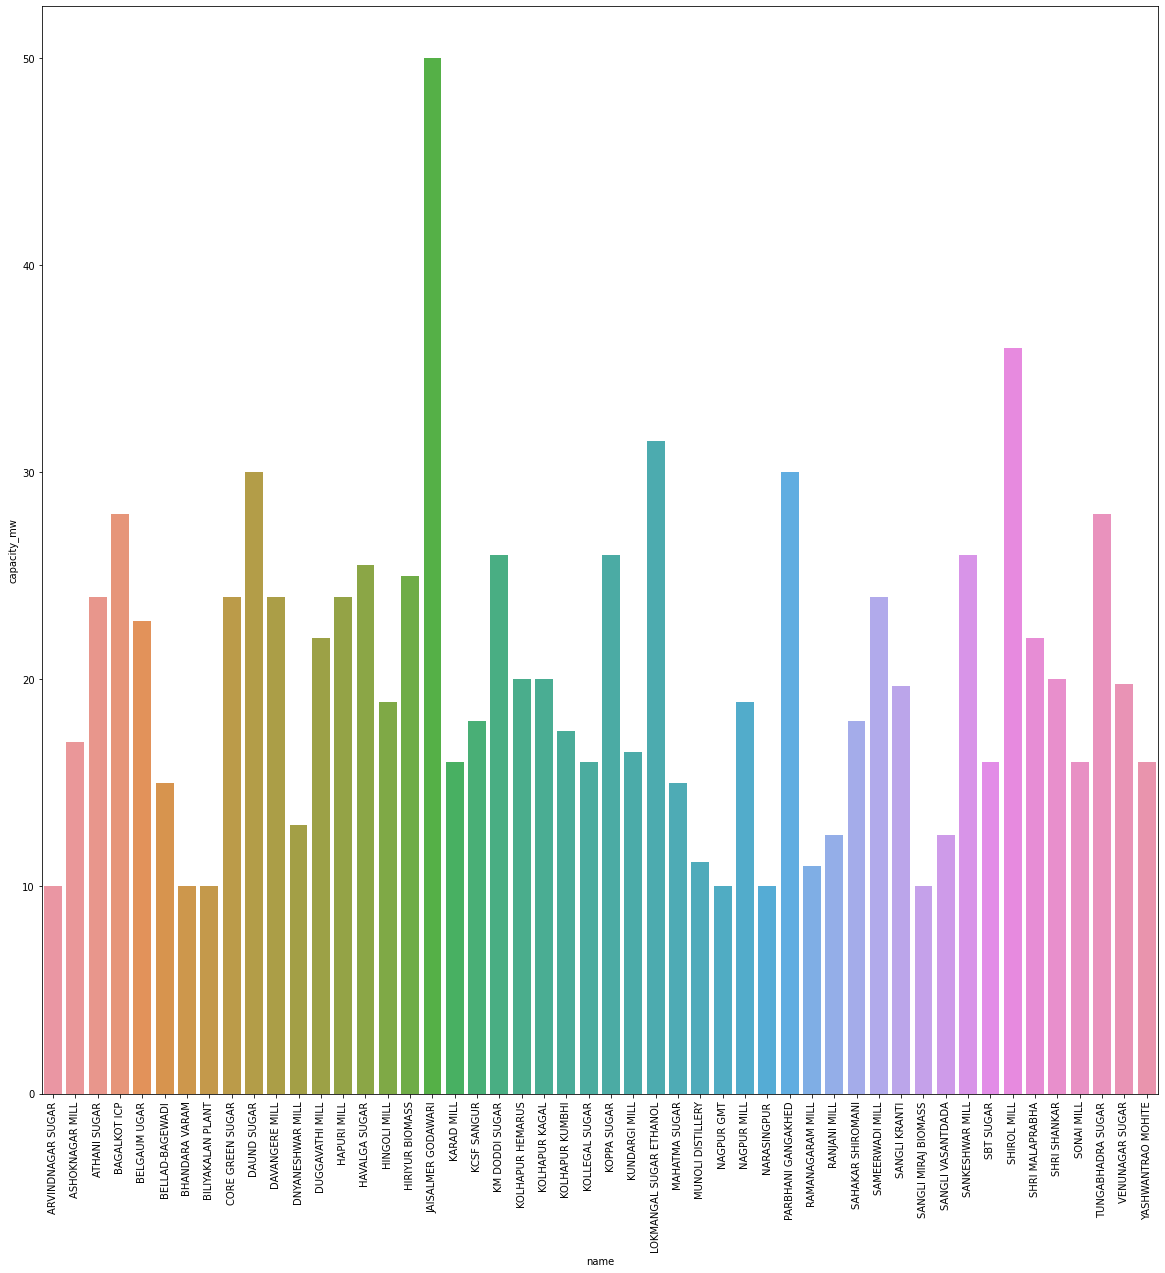

In [323]:
# plotting the capacity of Biomass power plant 
df_biomass=df[['name','capacity_mw',]][df['primary_fuel']=='Biomass']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_biomass[:50], x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

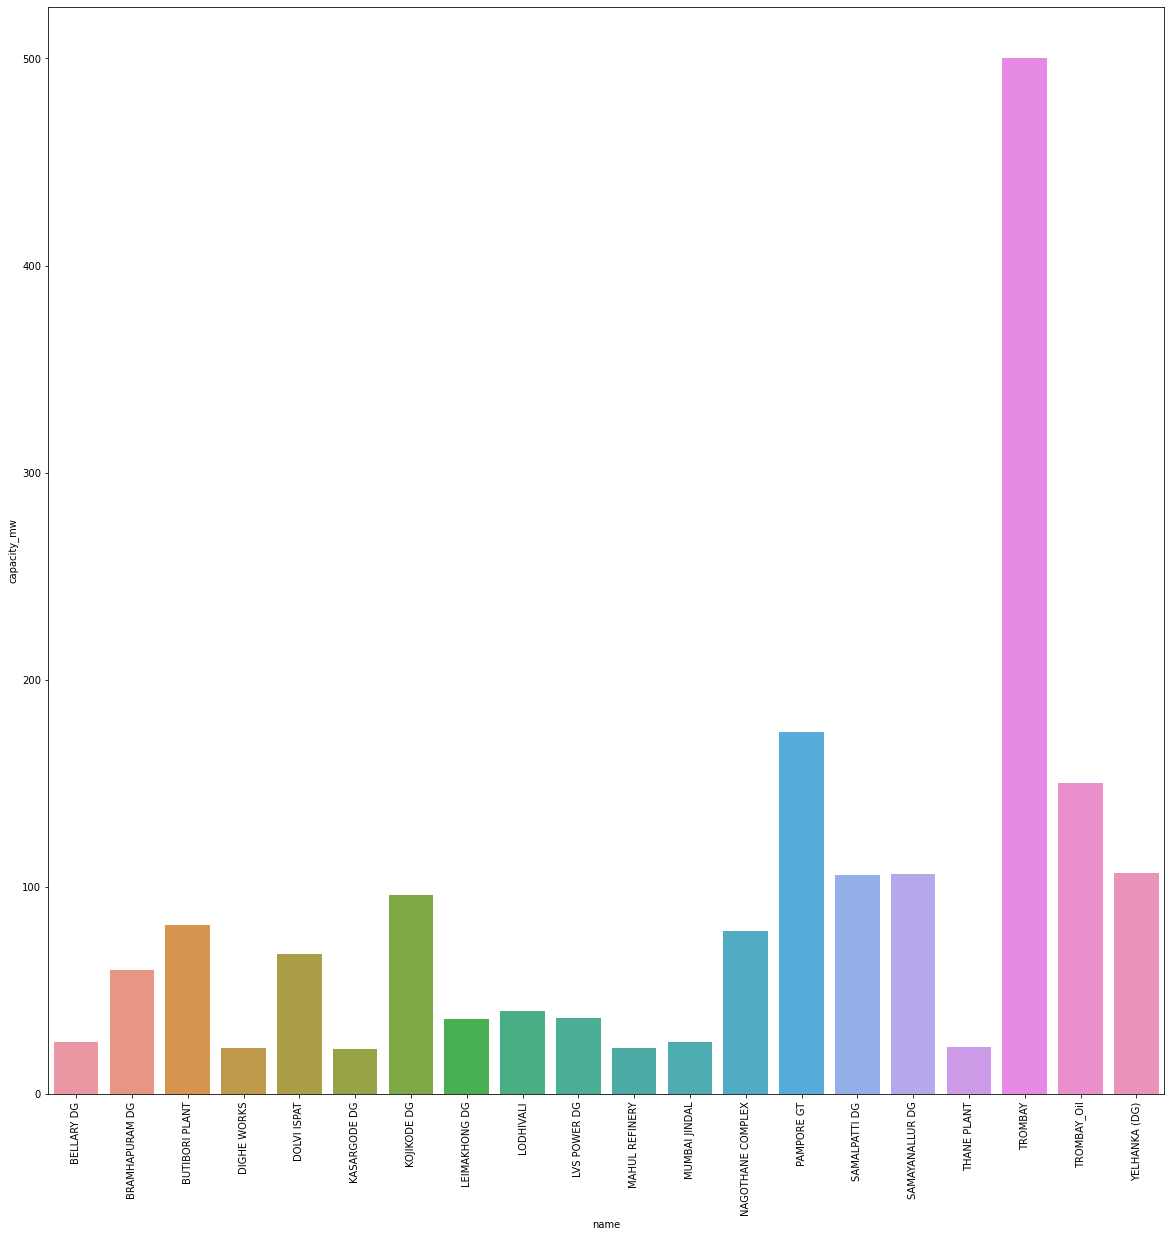

In [324]:
# plotting the capacity of Oil power plant 
df_oil=df[['name','capacity_mw',]][df['primary_fuel']=='Oil']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_oil, x='name', y='capacity_mw')

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

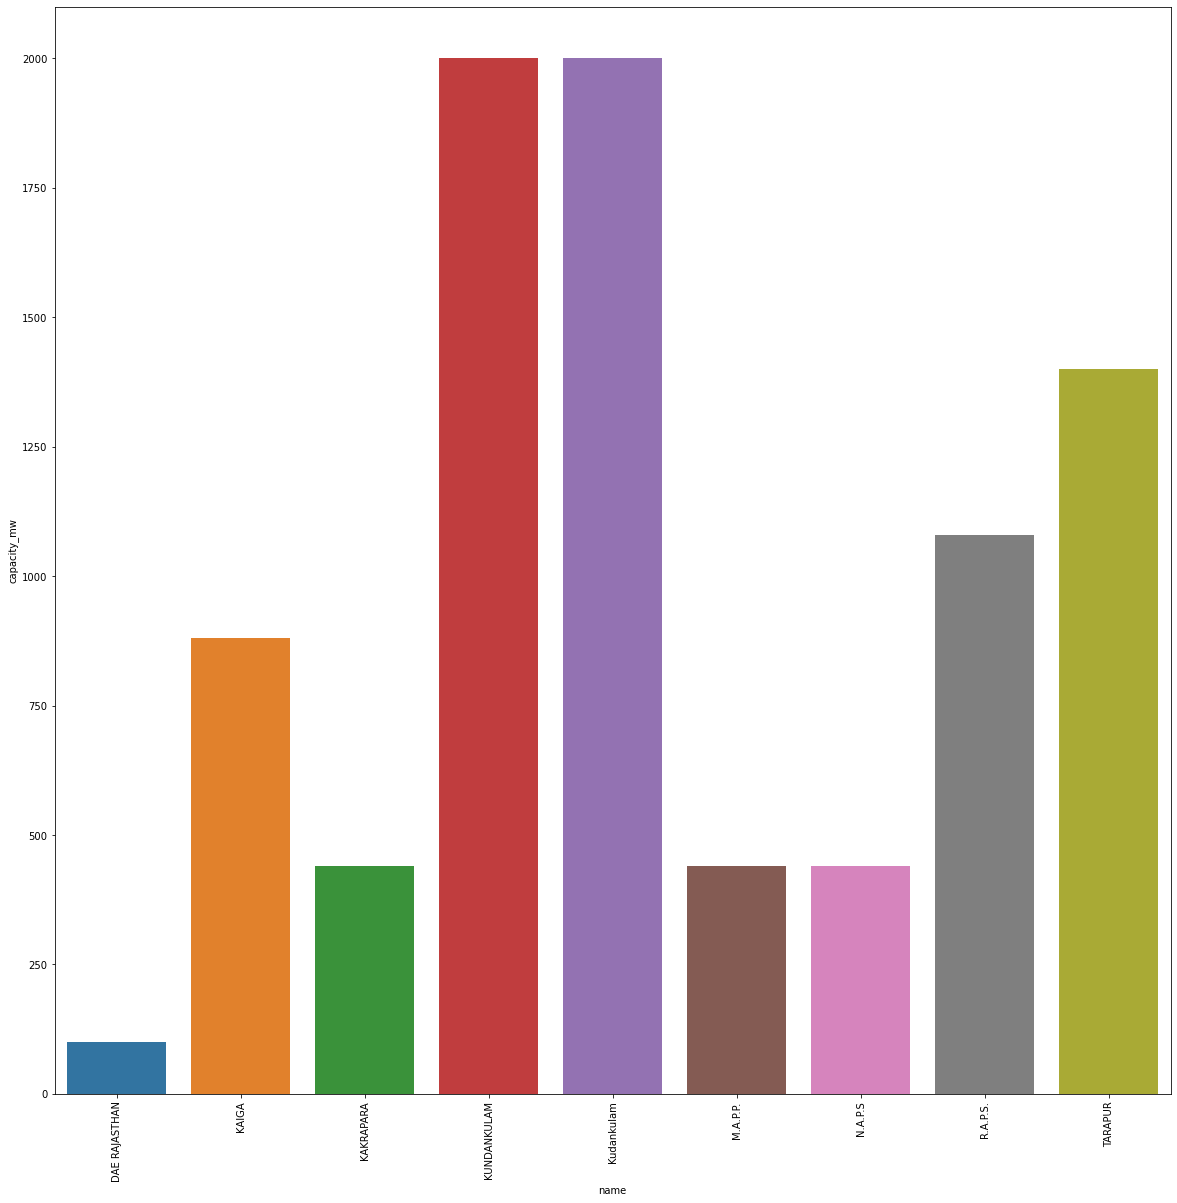

In [325]:
# plotting the capacity of Nuclear power plant 
df_nuclear=df[['name','capacity_mw',]][df['primary_fuel']=='Nuclear']
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(data=df_nuclear, x='name', y='capacity_mw')

In [326]:
# replacing nan values by zero in dataset
df.replace(to_replace=np.nan,value=0,inplace=True)

In [327]:
# finding the unique primary fuel
print(df['primary_fuel'].unique().tolist())

['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil', 'Nuclear']


In [328]:
df['primary_fuel'].replace({'Solar':1, 'Coal': 2,'Wind':3,'Gas':4,'Hydro':5,'Biomass':6,'Oil':7,'Nuclear':8}, inplace = True)

In [329]:
# finding the unique geolocation
print(df['geolocation_source'].unique().tolist())

['National Renewable Energy Laboratory', 'WRI', 0, 'Industry About']


In [330]:
df['geolocation_source'].replace({'National Renewable Energy Laboratory':11, 'WRI': 12,'Industry About':13}, inplace = True)

In [331]:
# finding the unique generation_data_source
#print(df['generation_data_source'].unique().tolist())

In [332]:
#df['generation_data_source'].replace({'Central Electricity Authority':1}, inplace = True)
#df.drop('generation_data_source',inplace=True)

In [333]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,1,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,11,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,2,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,12,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,3,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,12,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,4,2004.0,0,Central Electricity Authority,http://www.cea.nic.in/,12,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2,2015.0,0,Central Electricity Authority,http://www.cea.nic.in/,12,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2,2016.0,0,Central Electricity Authority,http://www.cea.nic.in/,12,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,13,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,3,0.0,0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,12,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,2,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,12,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [334]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

[]

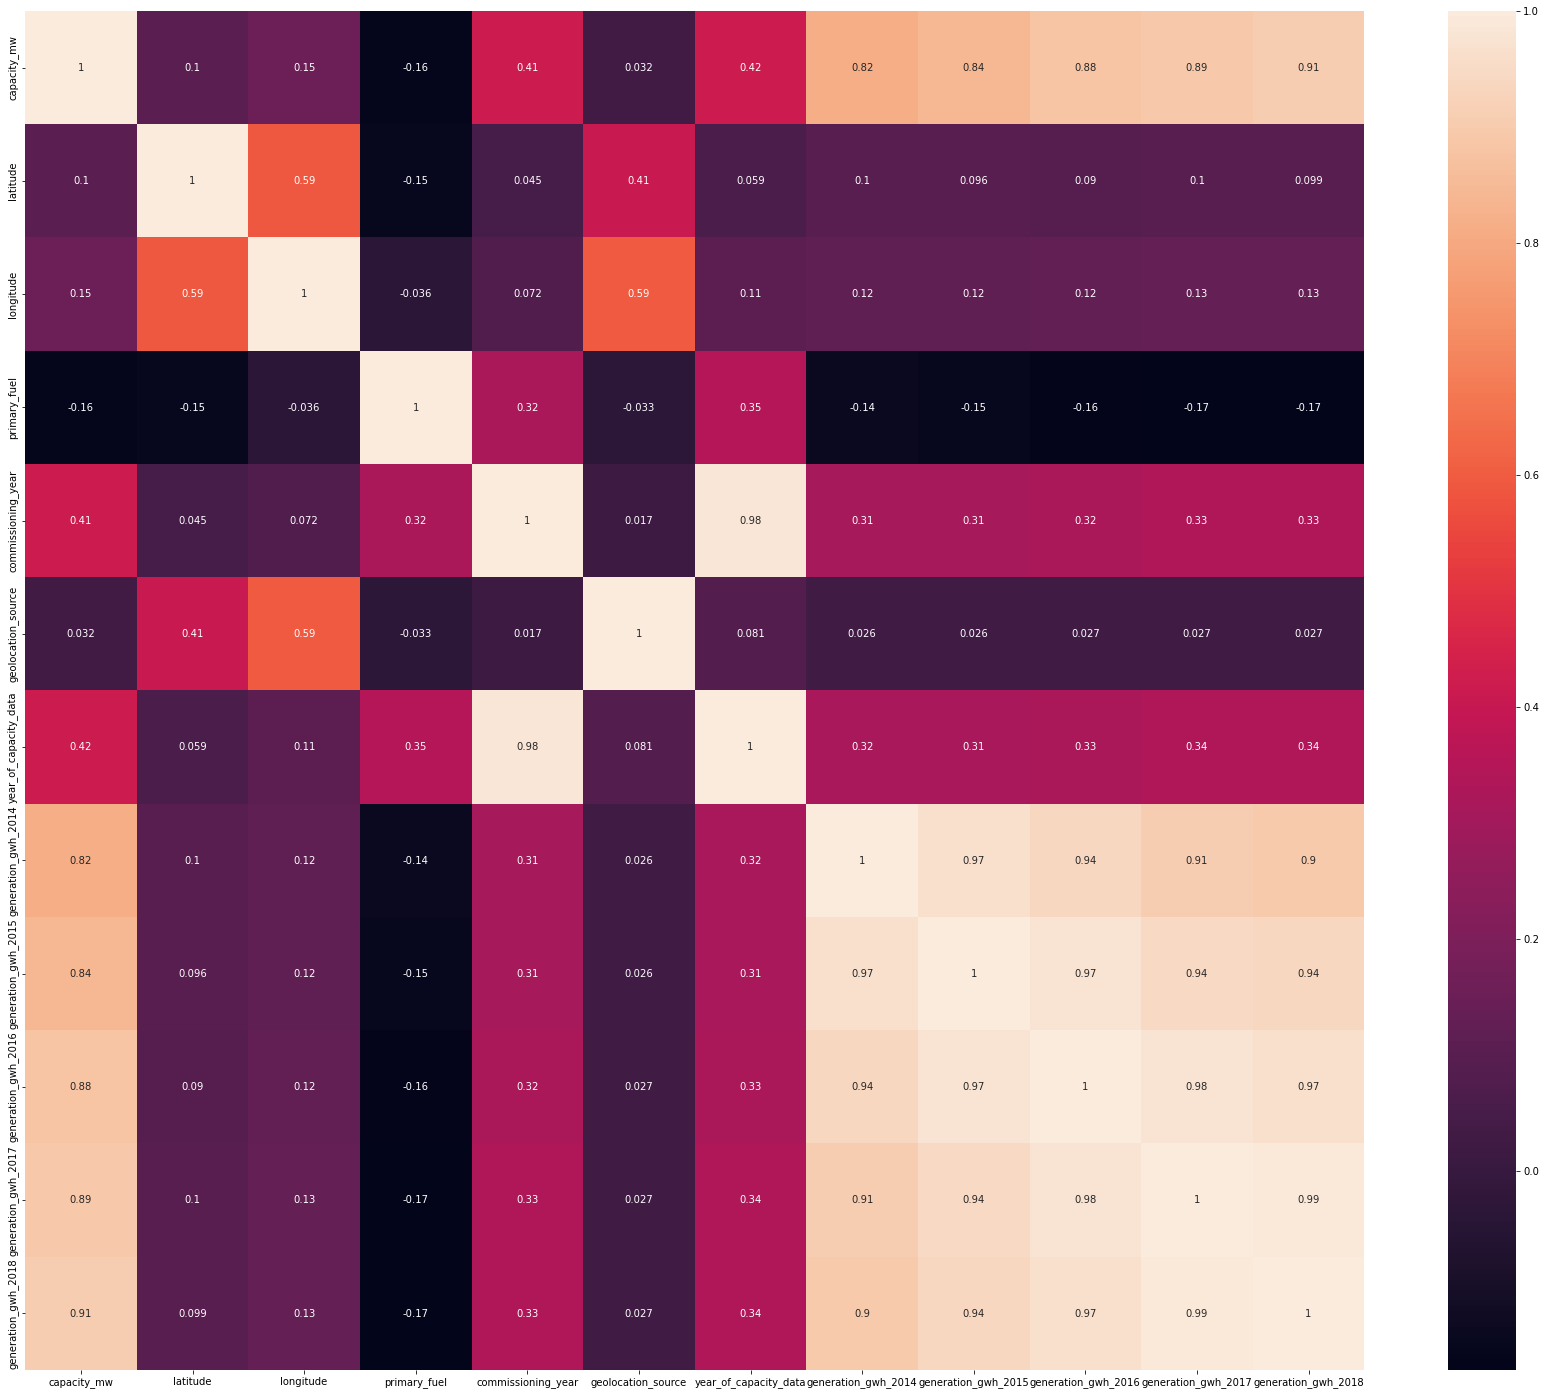

In [335]:
# finding the correlation of all columns to each other
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [336]:
# splitting data
X = df.drop(['country','country_long','name','primary_fuel','gppd_idnr','owner','url'],axis=1)
y =df['primary_fuel']

In [338]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))


In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [342]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

In [344]:
y_pred = classifier_logreg.predict(X_test)
y_pred

In [346]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score: 0.8601583113456465

Here accuracy score is satisfining means model is good

In [347]:
# predicting the capacity of plant
# splitting data
X = df.drop(['country','country_long','name','capacity_mw','gppd_idnr','owner','url'],axis=1)
y =df['capacity_mw']

In [349]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [355]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [357]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

In [360]:
Y_pred_knn = knn.predict(X_test)
# # KNN Classifier Evalulation
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))

Here we are getting better accuracy for the model